In [32]:
import pandas as pd

df = pd.read_csv("A:/NTI/SentimentAnalysisProject/data/processed/talabat_cleaned_reviews.csv")
df.dropna(subset=['clean_text', 'sentiment'], inplace=True)
df = df[df['sentiment'].isin(['positive', 'negative'])]  # focus on these
df.sample(5)

,userName,content,score,at,sentiment,clean_text
1496,مستخدم Google,افضل برنامج طلبت منه اكل و يوصل بسرعه,5,2025-06-21 19:27:14,positive,افضل طلبت اكل يوصل بسرعه
7067,مستخدم Google,ممتازة,1,2025-02-23 20:56:11,negative,ممتازه
1177,مستخدم Google,الطلب سريع وممتاز وتعامل العاملين جدا جيد,5,2025-06-28 11:31:38,positive,الطلب سريع وممتاز وتعامل العاملين جدا جيد
3980,مستخدم Google,ممتاز,5,2025-05-04 11:23:26,positive,ممتاز
4190,مستخدم Google,رائع,5,2025-04-29 16:56:42,positive,رائع


In [33]:
df.sentiment.value_counts()

sentiment
positive    7153
negative    2024
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

x = df['clean_text']
y = df['sentiment']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)


In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=10000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=10000)

              precision    recall  f1-score   support

    negative       0.68      0.95      0.79       412
    positive       0.98      0.87      0.92      1424

    accuracy                           0.89      1836
   macro avg       0.83      0.91      0.86      1836
weighted avg       0.92      0.89      0.89      1836



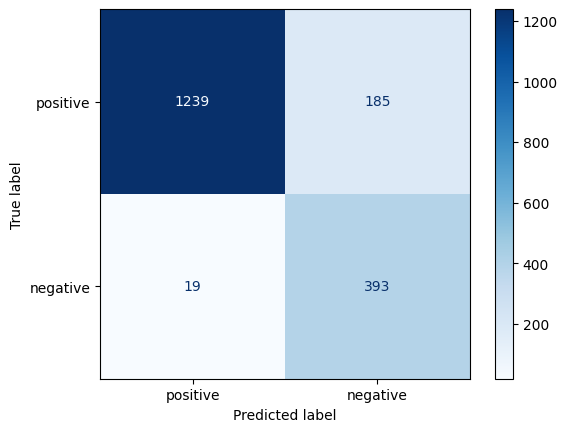

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["positive", "negative"])
disp.plot(cmap="Blues")


In [38]:
print("accuracy score: ", accuracy_score(y_test, y_pred))

accuracy score:  0.8888888888888888


In [39]:
import joblib

joblib.dump(model, "A:/NTI/SentimentAnalysisProject/models/sentiment_model.pkl")
joblib.dump(tfidf, "A:/NTI/SentimentAnalysisProject/models/TfidfVectorizer.pkl")


['A:/NTI/SentimentAnalysisProject/models/TfidfVectorizer.pkl']

In [40]:
sample = ["التطبيق ممتاز جدًا والخدمة رائعة"]

sample_tfidf = tfidf.transform(sample)
pred = model.predict(sample_tfidf)

print(f"sentence: {sample[0]}")
print(f"prediction: {pred[0]}")


sentence: التطبيق ممتاز جدًا والخدمة رائعة
prediction: positive


In [41]:
sample = ["الطلب ما وصل، وكل مرّة أطلب فيه تأخير"]

sample_tfidf = tfidf.transform(sample)
pred = model.predict(sample_tfidf)

print(f"sentence: {sample[0]}")
print(f"prediction: {pred[0]}")


sentence: الطلب ما وصل، وكل مرّة أطلب فيه تأخير
prediction: negative
